# Prim Algorithm

## pseudo code

```
void prim(int n, const number W[][], set_of_edges& F) {
   index i, vnear;
   number min;
   edge e;
   index nearest[2..n];
   number distance[2..n];

   F = ∅;
   for(i=2;i<=n;i++) {      nearest[i] = 1;
      distance[i] = W[1][i];
   }
   repeat(n-1 times) {      min = ∞;
      for(i=2;i<=n;i++)         if(0 <= distance[i] < min) {
            min = distance[i];
            vnear = i;
         }
      e = vnear가 인덱스인 마디를 Y에 추가한다.
      add e to F
      distance[vnear] = -1;
      for(i=2;i<=n;i++)
         if(W[i][vnear] < distance[i]) {
            distance[i] = W[i][vnear];
            nearest[i] = vnear
         }
   }
}
```

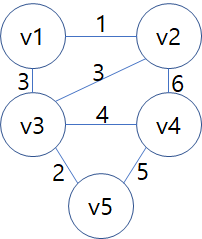

# Python

In [13]:
# void prim(int n, const number W[][], set_of_edges& F) {
#    index i, vnear;
#    number min;
#    edge e;
#    index nearest[2..n];
#    number distance[2..n];

#    F = ∅;
#    for(i=2;i<=n;i++) {
#        nearest[i] = 1;
#         distance[i] = W[1][i];
#    }
#    repeat(n-1 times) {      min = ∞;
#       for(i=2;i<=n;i++)         if(0 <= distance[i] < min) {
#             min = distance[i];
#             vnear = i;
#          }
#       e = vnear가 인덱스인 마디를 Y에 추가한다.
#       add e to F
#       distance[vnear] = -1;
#       for(i=2;i<=n;i++)
#          if(W[i][vnear] < distance[i]) {
#             distance[i] = W[i][vnear];
#             nearest[i] = vnear
#          }
#    }
# }

W = [[0, 1, 3, 999, 999],
     [1, 0, 3, 6, 999],
     [3, 3, 0, 4, 2],
     [999, 6, 4, 0, 5],
     [999, 999, 2, 5, 0]]
n = 5

def prim(n, W):
    nearest = [0 for row in range(n+1)]
    distance = [0 for row in range(n+1)]
    F = []
    Y = []
    
    for i in range(1, n):
        nearest[i] = 1
        distance[i] = W[0][i]
        
    for repeat in range(0, n-1):
        min = 999
        for i in range(1, n):
            if distance[i] >= 0 and distance[i] < min:
                min = distance[i]
                vnear = i
                
        e = Y.append(i)
        F.append(e)
        distance[vnear] = -1
        for i in range(1, n):
            if W[i][vnear] < distance[i]:
                distance[i] = W[i][vnear]
                nearest[i] = vnear
    return F, Y

In [14]:
F, Y = prim(n, W)

In [15]:
F

[None, None, None, None]

In [16]:
Y

[4, 4, 4, 4]

In [54]:
bin2(4, 3)

4

# floyd

## pseudo code

정점 i에서 j로 가는 최단경로의 길이
```
void floyd(int n, const number W[][], number D[][]) {
   index i, j, k;
   D = W;
   for(k=1;k<=n;k++)
      for(i=1;i<=n;i++)
         for(j=1;j<=n;j++)
            D[i][j] = minimum(D[i][j], D[i][k] + D[k][j]);
}
```

정점 i에서 j로 가는 최단경로의 길이와 최단경로의 중간에 놓여있는 마디를 출력

```
void floyd2(int n, const number W[][], number D[][], index P[][]) {
   index i, j, k;

   for(i=1;i<=n;i++)
      for(j=1;j<=n;j++)
         P[i][j] = 0;
   D = W;
   for(k=1;k<=n;k++)
      for(i=1;i<=n;i++)
         for(j=1;j<=n;j++)
            if(D[i][k] + D[k][j] < D[i][j]) {
               P[i][j] = k;
               D[i][j] = D[i][k] + D[k][j];
            }
}
```

P배열을 이용한 최단경로를 출력

```
void path(index q, r) {
   if(P[q][r] != 0) {
      path(q, P[q][r]);
      cout << “v” << P[q][r];
      path(P[q][r], r);
   }
}
```

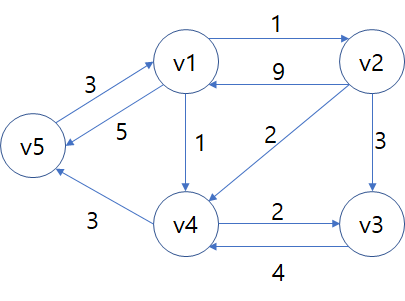

## Python

In [67]:
# 마디의 개수
n = 5

# 찾고자 하는 그래프 배열
W = [[0, 1, 999, 1, 5],
     [9, 0, 3, 2, 999],
     [999, 999, 0, 4, 999],
     [999, 999, 2, 0, 3],
     [3, 999, 999, 999, 0]
    ]

def minimum(x, y):
    if x < y:
        return x
    elif x > y:
        return y
    else:
        return x

def floyd(n, W):
    D = W

    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                D[i][j] = minimum(D[i][j], D[i][k]+D[k][j])
    return D

In [68]:
floyd(n, W)

[[0, 1, 3, 1, 4],
 [8, 0, 3, 2, 5],
 [10, 11, 0, 4, 7],
 [6, 7, 2, 0, 3],
 [3, 4, 6, 4, 0]]

In [97]:
n = 5
W = [[0, 1, 999, 1, 5],
     [9, 0, 3, 2, 999],
     [999, 999, 0, 4, 999],
     [999, 999, 2, 0, 3],
     [3, 999, 999, 999, 0]
    ]

def floyd2(n, W):
    P = []
    for i in range(0, n):
        P.insert(i, [])
        for j in range(0, n):
            P[i].insert(j, 0)
    D = W

    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                if D[i][k] + D[k][j] < D[i][j]:
                    P[i][j] = k
                    D[i][j] = D[i][k]+D[k][j]

    return P

In [98]:
P = floyd2(n, W)

In [99]:
P

[[0, 0, 3, 0, 3],
 [4, 0, 0, 0, 3],
 [4, 4, 0, 0, 3],
 [4, 4, 0, 0, 0],
 [0, 0, 3, 0, 0]]

In [102]:
# 이부분은 수정필요


def path(q, r):
    if P[q][r] != 0:
        path(q, P[q][r])
        print("v" + str(P[q][r]))
        path(P[q][r], r)

In [103]:
path(4, 2)
# 배열이기 때문에 인덱스가 0부터 시작이므로 실제 정점에서는 5에서 3

v3


# Tree 구현

In [ ]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BinarySearchTree(object):
    def __init__(self):
        self.root = None
        
    def insert(self, data):
        self.root = self._insert_value(self.root, data)
        return self.root is not None
    
    def _insert_value(self, node, data):
        if node is None:
            node = Node(data)
        else:
            if data <= node.data:
                

# minmult

## pseudo code

```
int minmult(int n, const int d[], index P[][]) {
   index i, j, k, diagonal;
   int M[1..n][1..n];

   for(i=1;i<=n;i++)
      M[i][i] = 0;
   for(diagonal = 1 ;diagonal<=n-1;diagonal++)
      for(i=1;i<=n-diagonal;i++) {
         j=i+diagonal
         M[i][j] = min┬(𝑖≤𝑘≤𝑗−1)⁡〖(𝑀[𝑖][𝑘]+𝑀[𝑘+1][𝑗]+𝑑[𝑖−1]∗𝑑[𝑘]∗𝑑[𝑗]);〗
         P[i][j] = 최소 횟수를 나타내는 k의 값;
      }
   return M[1][n];
}
```

```
      
void order(index i, index j) {
   if(i==j)
      cout << “A” << I
   else {
      k = P[i][j];
      cout << “(“;
      order(i, k);
      order(k+1, j);
      cout << “)”;
   }
}
```

# Python

In [ ]:
int minmult(int n, const int d[], index P[][]) {
   index i, j, k, diagonal;
   int M[1..n][1..n];

   for(i=1;i<=n;i++)
      M[i][i] = 0;
   for(diagonal = 1 ;diagonal<=n-1;diagonal++)
      for(i=1;i<=n-diagonal;i++) {
         j=i+diagonal
         M[i][j] = min┬(𝑖≤𝑘≤𝑗−1)⁡〖(𝑀[𝑖][𝑘]+𝑀[𝑘+1][𝑗]+𝑑[𝑖−1]∗𝑑[𝑘]∗𝑑[𝑗]);〗
         P[i][j] = 최소 횟수를 나타내는 k의 값;
      }
   return M[1][n];
}

void order(index i, index j) {
   if(i==j)
      cout << “A” << I
   else {
      k = P[i][j];
      cout << “(“;
      order(i, k);
      order(k+1, j);
      cout << “)”;
   }
}

In [ ]:
# n 행렬의 갯수 d 인덱스가 0~n까지의 정수 배열

def minmult(n, d):
    
    

# Binary Search Tree 수정필요

## pseudo code

In [ ]:
void search(node_pointer tree, keytype keyin, node_pointer& p) {
   bool found;

   p = tree;
   found = false;
   while(!found)
      if(p->key == keyin)
         found = true;
      else if(keyin < p->key);
         p = p->left;
      else
         p = p->right
}

void optsearchtree(int n, const float p[], float& minavg, index R[][]) {
   index i, j, k, diagonal;
   float A[1..n+1][0..n];
   for(i=1;i<=n;i++) {
      A[i][i-1] = 0;
      A[i][i] = p[i];
      R[i][i] = I;
      R[i][i-1] = 0;
   }
   A[n+1][n] = 0;
   R[n+1][n] = 0;
   for(diagonal = 1;diagonal<=n-1;diagonal++)
      for(i=1;i<=n-diagonal;i++) {         j = I + diagonal;
         A[i][j] = min┬(𝑖≤𝑘≤𝑗−1)⁡(𝐴[𝑖][𝑘−1]+𝐴[𝑘+1][𝑗])+ ∑_(𝑚=𝑖)^𝑗▒𝑝_𝑚 
         R[i][j] = 최소값을 주는 k의 값;
      }
   minavg = A[1][n];
}

node_pointer tree(index I, j) {
   index k;
   node_pointer p;
   
   k = R[i][j]
   if(k == 0)
      return NULL;
   else {
      p = new_nodetype;
      p->key = Key[k];
      p->left = tree(I, k-1);
      p->right = tree(k+1, j);
      return p;
   }
}



## Python

In [104]:
void search(node_pointer tree, keytype keyin, node_pointer& p) {
   bool found;

   p = tree;
   found = false;
   while(!found)
      if(p->key == keyin)
         found = true;
      else if(keyin < p->key);
         p = p->left;
      else
         p = p->right
}

void optsearchtree(int n, const float p[], float& minavg, index R[][]) {
   index i, j, k, diagonal;
   float A[1..n+1][0..n];
   for(i=1;i<=n;i++) {
      A[i][i-1] = 0;
      A[i][i] = p[i];
      R[i][i] = I;
      R[i][i-1] = 0;
   }
   A[n+1][n] = 0;
   R[n+1][n] = 0;
   for(diagonal = 1;diagonal<=n-1;diagonal++)
      for(i=1;i<=n-diagonal;i++) {         j = I + diagonal;
         A[i][j] = min┬(𝑖≤𝑘≤𝑗−1)⁡(𝐴[𝑖][𝑘−1]+𝐴[𝑘+1][𝑗])+ ∑_(𝑚=𝑖)^𝑗▒𝑝_𝑚 
         R[i][j] = 최소값을 주는 k의 값;
      }
   minavg = A[1][n];
}

node_pointer tree(index I, j) {
   index k;
   node_pointer p;
   
   k = R[i][j]
   if(k == 0)
      return NULL;
   else {
      p = new_nodetype;
      p->key = Key[k];
      p->left = tree(I, k-1);
      p->right = tree(k+1, j);
      return p;
   }
}



SyntaxError: invalid syntax (<ipython-input-104-8ec4e6999382>, line 1)

In [109]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
            
class Tree(object):
    def __init__(self):
        self.root = None

node = []
node.append(Node('A'))

# traveling salesman problem

## pseudo code

```
void travel(int n, const number W[][], index P[][], number& minlength) {
   index i, j, k;
   number D[1..n][subset of V-{𝑣_1}];
   
   for(i=2;i<=n;i++)
      D[i][∅] = W[i][1];
   for(k=1;k<=n-2;k++)
      for(A⊆V-{𝑣_1}를 만족하면서 마디가 k개인 모든 부분집합 A)
         for(i != 1와 𝑣_𝑖∉ A를 만족하는 모든 i) {
            D[i][A] = min┬(𝑗:𝑣_𝑗∈𝐴)⁡(𝑊[𝑖][𝑗]+𝐷[𝑗][𝐴−{𝑣_𝑖 }])
            P[i][A] = 최소가 되는 j값;
         }
   D[1][V-{𝑣_1}] = min┬(2≤𝑗≤𝑛)⁡(𝑊[1][𝑗]+𝐷[𝑗][𝑉−{𝑣_1,𝑣_𝑗 }]);
   P[1][V-{𝑣_1}] = 최소가 되는 j값;
   minlength = D[1][V-{𝑣_1}];
}
```


# Python

In [ ]:
void travel(int n, const number W[][], index P[][], number& minlength) {
   index i, j, k;
   number D[1..n][subset of V-{𝑣_1}];

   for(i=2;i<=n;i++)
      D[i][∅] = W[i][1];
   for(k=1;k<=n-2;k++)
      for(A⊆V-{𝑣_1}를 만족하면서 마디가 k개인 모든 부분집합 A)
         for(i != 1와 𝑣_𝑖∉ A를 만족하는 모든 i) {
            D[i][A] = min┬(𝑗:𝑣_𝑗∈𝐴)⁡(𝑊[𝑖][𝑗]+𝐷[𝑗][𝐴−{𝑣_𝑖 }])
            P[i][A] = 최소가 되는 j값;
         }
   D[1][V-{𝑣_1}] = min┬(2≤𝑗≤𝑛)⁡(𝑊[1][𝑗]+𝐷[𝑗][𝑉−{𝑣_1,𝑣_𝑗 }]);
   P[1][V-{𝑣_1}] = 최소가 되는 j값;
   minlength = D[1][V-{𝑣_1}];
}

n = 4
W = [
     [0, 2, 9, 999],
     [1, 0, 6, 4],
     [999, 7, 0, 8],
     [6, 3, 999, 0]
    ]


def travel(n, W, P, minlength):
    